In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimpleStew/'

In [3]:
final_df=pd.read_csv('SimpleStew_MS_PerStep.csv')

In [4]:
filtered_stirstew = final_df[final_df['Step'].str.strip() == 'Stir Stew']
filtered_stirstew = filtered_stirstew[filtered_stirstew['Participant'] != 'C029']
filtered_stirstew
#C029 is not included

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
9,C001,36,Stir Stew,90.138358,134.120134,120.829925,124.009876,132.623559,445.504319,0.000000,0.000000
19,C003,58,Stir Stew,40.532867,107.558008,34.801405,28.183456,35.260268,502.933011,265.485212,184.388790
29,C006,42,Stir Stew,42.021392,157.365390,0.000000,49.179454,118.324919,674.257603,453.228289,283.039911
39,C008,34,Stir Stew,239.412143,466.561259,498.906194,510.501063,454.237010,1191.492808,997.801533,734.339878
48,C009,24,Stir Stew,180.462248,252.347436,291.379632,246.464791,261.803254,769.368553,639.724118,437.651870
58,C012,54,Stir Stew,102.162579,132.246780,186.650365,137.935384,201.916075,762.627879,552.592354,325.503183
66,C013,48,Stir Stew,1119.004957,1240.710926,1247.138569,1258.734392,1589.584368,2816.012172,2422.945311,1833.909073
76,C016,39,Stir Stew,149.041946,195.893943,224.334038,224.642758,216.270730,770.165733,545.896340,398.532594
86,C017,36,Stir Stew,54.388560,147.637918,0.000000,77.496420,114.798720,419.418539,281.667443,182.842891
96,C020,30,Stir Stew,98.024993,145.704809,99.133999,115.300442,117.882908,487.370570,366.899345,233.573050


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_stirstew = filtered_stirstew.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_stirstew.select_dtypes(include=['float64', 'int64']).columns
filtered_stirstew[numerical_cols] = filtered_stirstew[numerical_cols].replace(0, np.nan)

filtered_stirstew[numerical_cols] = imputer.fit_transform(filtered_stirstew[numerical_cols])
filtered_stirstew

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
9,C001,36.0,Stir Stew,90.138358,134.120134,120.829925,124.009876,132.623559,445.504319,366.899345,233.573050
19,C003,58.0,Stir Stew,40.532867,107.558008,34.801405,28.183456,35.260268,502.933011,265.485212,184.388790
29,C006,42.0,Stir Stew,42.021392,157.365390,186.650365,49.179454,118.324919,674.257603,453.228289,283.039911
39,C008,34.0,Stir Stew,239.412143,466.561259,498.906194,510.501063,454.237010,1191.492808,997.801533,734.339878
48,C009,24.0,Stir Stew,180.462248,252.347436,291.379632,246.464791,261.803254,769.368553,639.724118,437.651870
58,C012,54.0,Stir Stew,102.162579,132.246780,186.650365,137.935384,201.916075,762.627879,552.592354,325.503183
66,C013,48.0,Stir Stew,1119.004957,1240.710926,1247.138569,1258.734392,1589.584368,2816.012172,2422.945311,1833.909073
76,C016,39.0,Stir Stew,149.041946,195.893943,224.334038,224.642758,216.270730,770.165733,545.896340,398.532594
86,C017,36.0,Stir Stew,54.388560,147.637918,54.865752,77.496420,114.798720,419.418539,281.667443,182.842891
96,C020,30.0,Stir Stew,98.024993,145.704809,99.133999,115.300442,117.882908,487.370570,366.899345,233.573050


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Stir Stew',
    'HeadCamera Distance': 'HeadCamera Distance - Stir Stew',
    'LeftElbow Distance': 'LeftElbow Distance - Stir Stew',
    'LeftShoulder Distance': 'LeftShoulder Distance - Stir Stew',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Stir Stew',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Stir Stew',
    'RightElbow Distance': 'RightElbow Distance - Stir Stew',
    'RightShoulder Distance': 'RightShoulder Distance - Stir Stew'
}

# Rename columns
filtered_stirstew = filtered_stirstew.rename(columns=new_column_names)
filtered_stirstew

,Participant,Block Design Raw Score,Step,Chest Distance - Stir Stew,HeadCamera Distance - Stir Stew,LeftElbow Distance - Stir Stew,LeftShoulder Distance - Stir Stew,MotionControllerLeft Distance - Stir Stew,MotionControllerRight Distance - Stir Stew,RightElbow Distance - Stir Stew,RightShoulder Distance - Stir Stew
9,C001,36.0,Stir Stew,90.138358,134.120134,120.829925,124.009876,132.623559,445.504319,366.899345,233.573050
19,C003,58.0,Stir Stew,40.532867,107.558008,34.801405,28.183456,35.260268,502.933011,265.485212,184.388790
29,C006,42.0,Stir Stew,42.021392,157.365390,186.650365,49.179454,118.324919,674.257603,453.228289,283.039911
39,C008,34.0,Stir Stew,239.412143,466.561259,498.906194,510.501063,454.237010,1191.492808,997.801533,734.339878
48,C009,24.0,Stir Stew,180.462248,252.347436,291.379632,246.464791,261.803254,769.368553,639.724118,437.651870
58,C012,54.0,Stir Stew,102.162579,132.246780,186.650365,137.935384,201.916075,762.627879,552.592354,325.503183
66,C013,48.0,Stir Stew,1119.004957,1240.710926,1247.138569,1258.734392,1589.584368,2816.012172,2422.945311,1833.909073
76,C016,39.0,Stir Stew,149.041946,195.893943,224.334038,224.642758,216.270730,770.165733,545.896340,398.532594
86,C017,36.0,Stir Stew,54.388560,147.637918,54.865752,77.496420,114.798720,419.418539,281.667443,182.842891
96,C020,30.0,Stir Stew,98.024993,145.704809,99.133999,115.300442,117.882908,487.370570,366.899345,233.573050


In [7]:
tracker_columns = ['Chest Distance - Stir Stew', 'HeadCamera Distance - Stir Stew', 'LeftElbow Distance - Stir Stew', 'LeftShoulder Distance - Stir Stew',
                   'RightElbow Distance - Stir Stew', 'RightShoulder Distance - Stir Stew', 'MotionControllerLeft Distance - Stir Stew',
                   'MotionControllerRight Distance - Stir Stew']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_stirstew, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_stirstew[block_design_col], filtered_stirstew[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_stirstew, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Stir Stew,-0.418459,0.120582
1,HeadCamera Distance - Stir Stew,-0.447629,0.094299
2,LeftElbow Distance - Stir Stew,-0.312108,0.257423
3,LeftShoulder Distance - Stir Stew,-0.420771,0.118333
4,RightElbow Distance - Stir Stew,-0.226703,0.416501
5,RightShoulder Distance - Stir Stew,-0.244624,0.379568
6,MotionControllerLeft Distance - Stir Stew,-0.456582,0.087115
7,MotionControllerRight Distance - Stir Stew,-0.084154,0.765565


In [8]:
#filtered_stirstew.to_csv('SimpleStew_StirStew.csv',index=False)

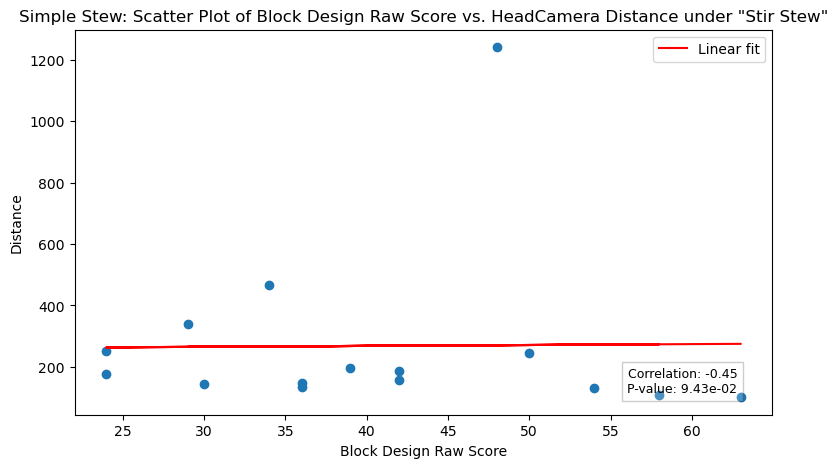

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['HeadCamera Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['HeadCamera Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['HeadCamera Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. HeadCamera Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '41 SS_StirStewDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

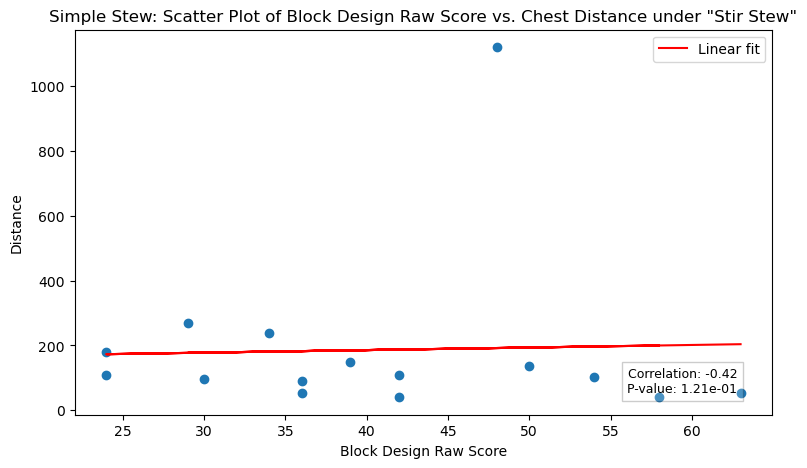

In [10]:
correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['Chest Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['Chest Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['Chest Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Chest Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '42 SS_StirStewDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

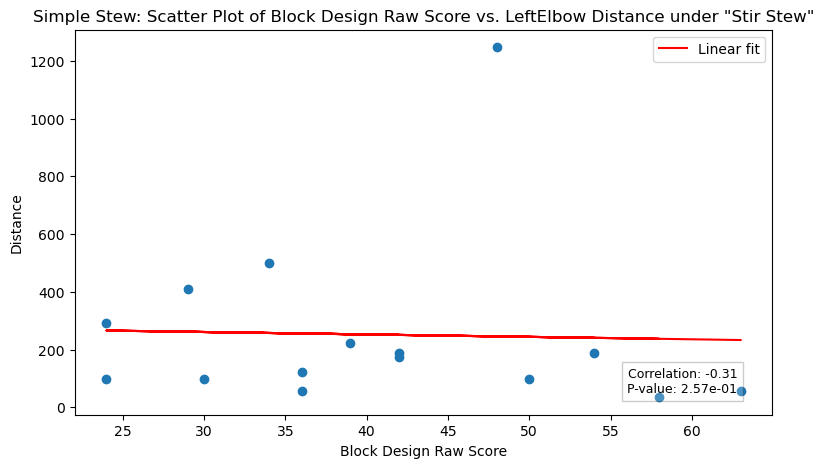

In [11]:
correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['LeftElbow Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['LeftElbow Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['LeftElbow Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. LeftElbow Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '43 SS_StirStewDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

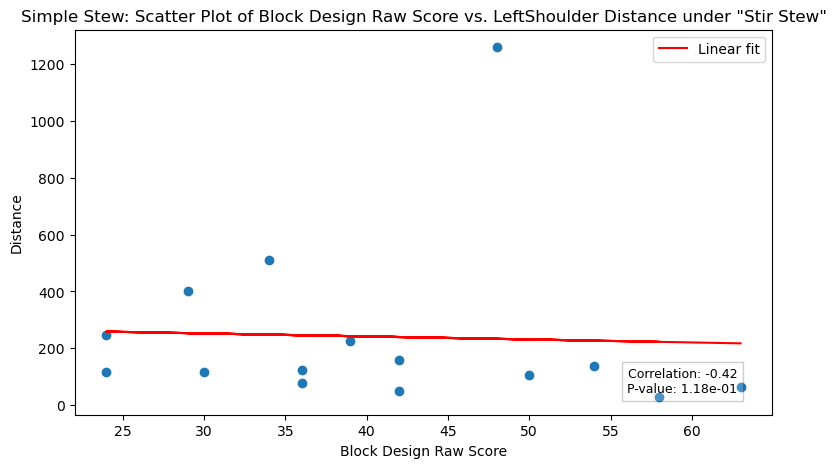

In [12]:
correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['LeftShoulder Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['LeftShoulder Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['LeftShoulder Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. LeftShoulder Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '44 SS_StirStewDistanceLeftShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

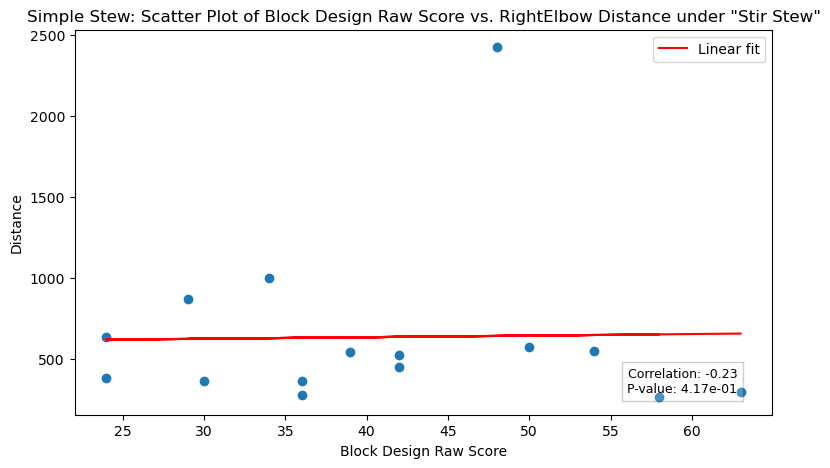

In [13]:
correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['RightElbow Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['RightElbow Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['RightElbow Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. RightElbow Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '45 SS_StirStewDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

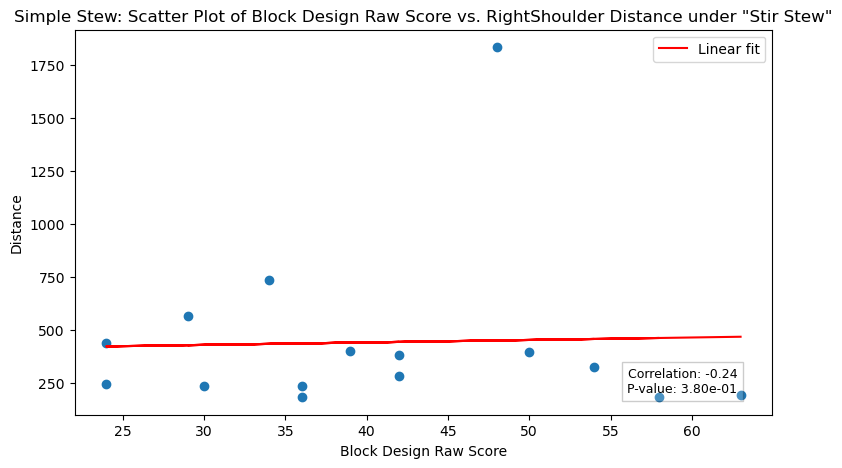

In [14]:
correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['RightShoulder Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['RightShoulder Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['RightShoulder Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. RightShoulder Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '46 SS_StirStewDistanceRightShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

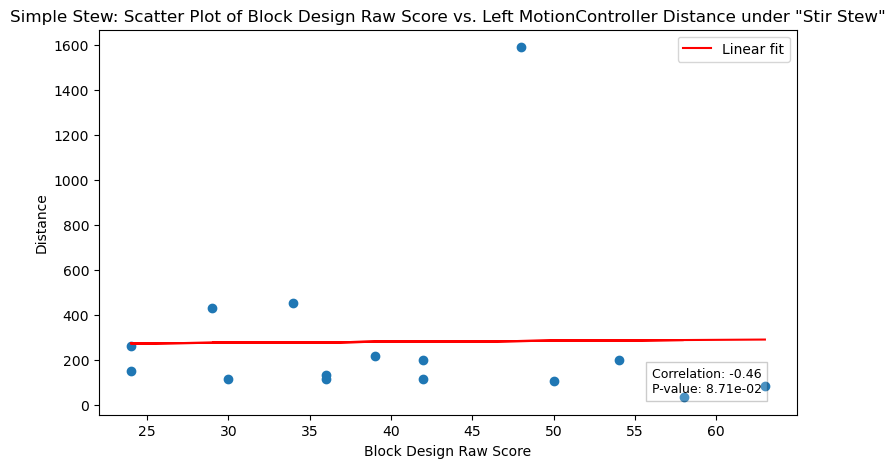

In [15]:
correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['MotionControllerLeft Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['MotionControllerLeft Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['MotionControllerLeft Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '47 SS_StirStewDistanceLeftControl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

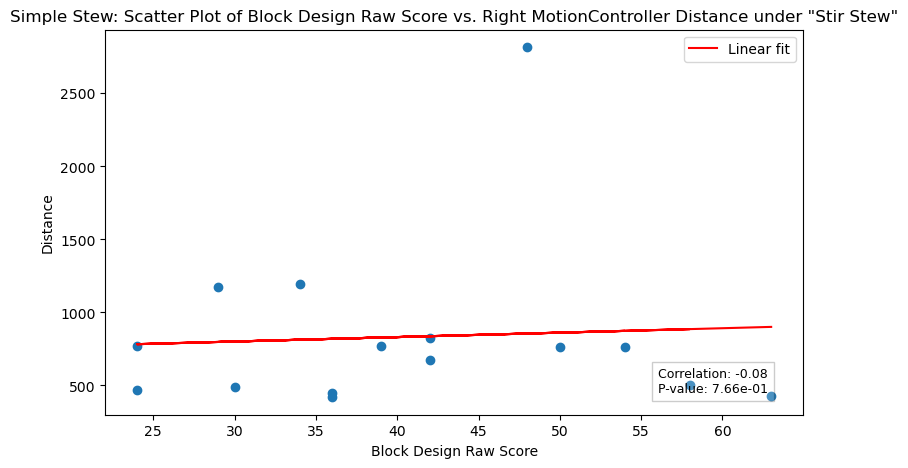

In [16]:
correlation, p_value = spearmanr(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['MotionControllerRight Distance - Stir Stew'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['MotionControllerRight Distance - Stir Stew'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_stirstew['Block Design Raw Score'], filtered_stirstew['MotionControllerRight Distance - Stir Stew'], 1)
fit_line = slope * filtered_stirstew['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_stirstew['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Stir Stew"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '48 SS_StirStewDistanceRightControl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()